# 阈值处理
![title](threshold.png)
参考：https://www.cnblogs.com/polly333/p/7284223.html

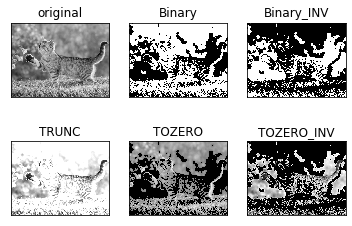

In [11]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


img = cv2.imread('images/cat.jpg')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#plt.imshow(img_gray)
ret,thresh1 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_gray,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO_INV)

titles = ['original','Binary','Binary_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_gray, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    #print(i)
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


## 自适应阈值
方法cv.adaptiveThreshold

void cv::adaptiveThreshold(  
    cv::InputArray src, // 输入图像  
    double maxValue, // 向上最大值  
    int adaptiveMethod, // 自适应方法，平均或高斯  
    int thresholdType // 阈值化类型  
    int blockSize, // 块大小  
    double C // 常量  
);

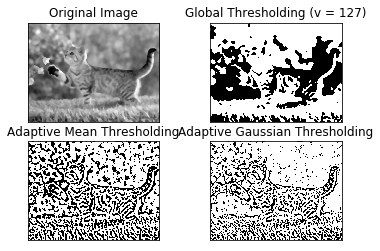

In [15]:
img_gray = cv2.medianBlur(img_gray,5)  #均值滤波
ret,th1 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img_gray, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()